<a href="https://colab.research.google.com/github/mukulpalmia07/Email_Spam_Classifier/blob/main/Email_Spam_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing the dependencies

In [3]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

#Data Processing

In [18]:
mail_data = pd.read_csv('/content/mail_data.csv', encoding = 'ISO-8859-1')

In [19]:
print(mail_data)

     Category                                            Message
0         ham  Go until jurong point, crazy.. Available only ...
1         ham                      Ok lar... Joking wif u oni...
2        spam  Free entry in 2 a wkly comp to win FA Cup fina...
3         ham  U dun say so early hor... U c already then say...
4         ham  Nah I don't think he goes to usf, he lives aro...
...       ...                                                ...
5567     spam  This is the 2nd time we have tried 2 contact u...
5568      ham              Will Ã¼ b going to esplanade fr home?
5569      ham  Pity, * was in mood for that. So...any other s...
5570      ham  The guy did some bitching but I acted like i'd...
5571      ham                         Rofl. Its true to its name

[5572 rows x 2 columns]


In [20]:
mail_data.isnull().sum()

Category    0
Message     0
dtype: int64

In [21]:
mail_data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [22]:
mail_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [23]:
mail_data.shape

(5572, 2)

Convert Category spam = 0 and ham = 1

In [24]:
mail_data.loc[mail_data['Category'] == 'spam', 'Category',] = 0
mail_data.loc[mail_data['Category'] == 'ham', 'Category',] = 1

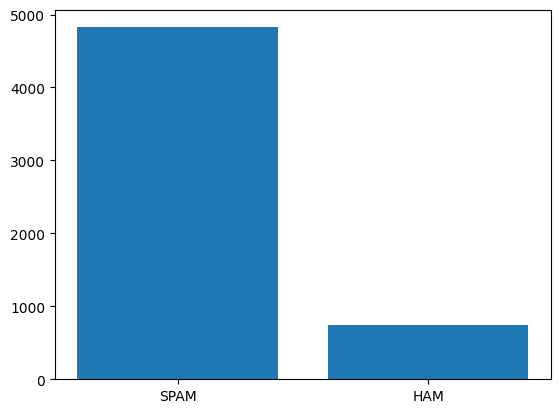

In [50]:
# Checking the distribution of target column
plt.bar(['SPAM', 'HAM'],mail_data['Category'].value_counts())
plt.show()

In [36]:
# Separating the data and label
X = mail_data['Message'].values
Y = mail_data['Category'].values

#Spliting the Data into training and test data

In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

In [27]:
print(X.shape, X_train.shape, X_test.shape)

(5572,) (4457,) (1115,)


In [29]:
# Converting the textual data to numerical data
vectorizer = TfidfVectorizer(min_df = 1, stop_words = 'english', lowercase = True)
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)
Y_train = Y_train.astype('int')
Y_test = Y_test.astype('int')

#Training the Machine Learning Model

In [30]:
model = LogisticRegression()

In [31]:
model.fit(X_train, Y_train)

LogisticRegression()

#Model Evaluation

Accuracy Score

In [32]:
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)

In [33]:
print('Accuracy score on the training data :', training_data_accuracy)

Accuracy score on the training data : 0.96881310298407


In [34]:
X_test_prediction = model.predict(X_test)
testing_data_accuracy = accuracy_score(Y_test, X_test_prediction)

In [35]:
print('Accuracy score on the testing data :', testing_data_accuracy)


Accuracy score on the testing data : 0.9533632286995516


Model Accuracy = 95 %

Confusion Matrix

In [37]:
Y_pred = model.predict(X_test)
cm = confusion_matrix(Y_test, Y_pred, labels = mail_data['Category'].unique())
mail_data_cm = pd.DataFrame(cm, index = mail_data['Category'].unique(), columns = mail_data.Category.unique())
mail_data_cm

,1,0
1,956,1
0,51,107


Confusion Matrix in percentage expression

In [39]:
mail_data_cm_percentage = mail_data_cm.copy()
for val in mail_data_cm_percentage:
  mail_data_cm_percentage[val] /= mail_data_cm_percentage[val].sum()
mail_data_cm_percentage

,1,0
1,0.949355,0.009259
0,0.050645,0.990741


#Saving the trained model

In [40]:
import pickle

In [41]:
filename = 'trained_model.sav'
pickle.dump(model, open(filename, 'wb'))

#Using the saved model for the future prediction

In [42]:
# Loading the saved model
loaded_model = pickle.load(open('/content/trained_model.sav', 'rb'))

In [48]:
new_mail = 'WINNER!! As a valued network customer you have been selected to receivea å£900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only'
vectmail = vectorizer.transform(np.array([new_mail]))
prediction = loaded_model.predict(vectmail)
print(prediction)
if prediction[0] == 1: print("This mail is HAM")
else: print("This mail is SPAM !")

[0]
This mail is SPAM !


In [49]:
new_mail_list = ['WINNER!! As a valued network customer you have been selected to receivea å£900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only', 'Is that seriously how you spell his name?']
vectmail = vectorizer.transform(np.array(new_mail_list))
prediction = loaded_model.predict(vectmail)
for val, i in enumerate(new_mail_list):
  print(i, ': This mail is', 'HAM' if prediction[val] == 1 else 'SPAM')

WINNER!! As a valued network customer you have been selected to receivea å£900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only : This mail is SPAM
Is that seriously how you spell his name? : This mail is HAM
